<center>Jaemin Son, 2018320192</center><br>

# Gradient Descent in One Dimension

In [1]:
import sys
sys.path.insert(0, '..')
%matplotlib inline
import d2l
import numpy as np
import math

def f(x):     return x**2  # objective function
def gradf(x): return 2 * x # its derivative

In [2]:
def gd(eta):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * gradf(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results

res = gd(0.2)

epoch 10, x: 0.06046617599999997


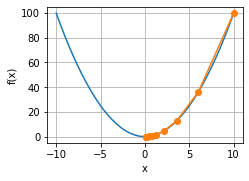

In [3]:
def show_trace(res):
    n = max(abs(min(res)), abs(max(res)))
    f_line = np.arange(-n, n, 0.01)
    d2l.set_figsize((3.5, 2.5))
    d2l.plot([f_line, res], [[f(x) for x in f_line], [f(x) for x in res]],'x', 'f(x)', fmts=['-', '-o'])

show_trace(res)

# Learning Rate

epoch 10, x: 3.4867844009999995


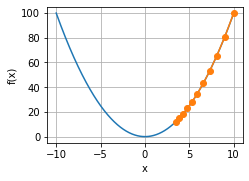

In [4]:
show_trace(gd(0.05))

epoch 10, x: 61.917364224000096


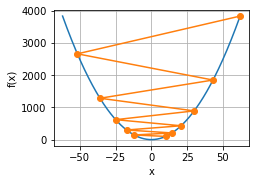

In [5]:
show_trace(gd(1.1))

# Local Minima

epoch 10, x: -1.5281659276350823


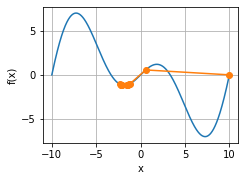

In [6]:
c = 0.15 * math.pi
def f(x):     return x*math.cos(c * x) 
def gradf(x): return math.cos(c * x) - c * x * math.sin(c * x)

show_trace(gd(2))

# Multivariate Gradient Descent

epoch 20, x1 -0.057646, x2 -0.000073


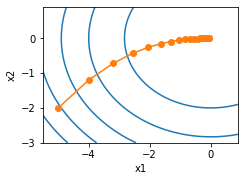

In [7]:
def f(x1, x2): return x1 ** 2 + 2 * x2 ** 2   # objective
def gradf(x1, x2): return (2 * x1, 4 * x2)    # gradient 
def gd(x1, x2, s1, s2): 
    (g1, g2) = gradf(x1, x2)                  # compute gradient
    return (x1 -eta * g1, x2 -eta * g2, 0, 0) # update variables

eta = 0.1
d2l.show_trace_2d(f, d2l.train_2d(gd))

# Newton's Method

epoch 10, x: 0.0


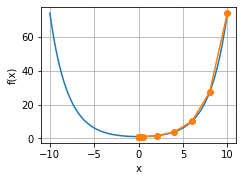

In [8]:
c = 0.5
def f(x):     return math.cosh(c * x)        # objective
def gradf(x): return c * math.sinh(c * x)    # derivative
def hessf(x): return c**2 * math.cosh(c * x) # hessian

# hide learning rate for now
def newton(eta = 1):
    x = 10
    results = [x]
    for i in range(10):
        x -= eta * gradf(x) / hessf(x)
        results.append(x)
    print('epoch 10, x:', x)
    return results

show_trace(newton())

epoch 10, x: 26.83413291324767


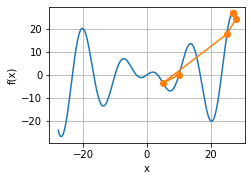

In [9]:
c = 0.15 * math.pi
def f(x):     return x*math.cos(c * x) 
def gradf(x): return math.cos(c * x) - c * x * math.sin(c * x)
def hessf(x): return - 2 * c * math.sin(c * x) - x * c**2 * math.cos(c * x)

show_trace(newton())

epoch 10, x: 7.269860168684531


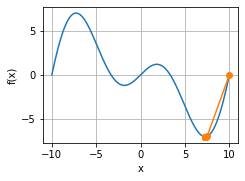

In [10]:
show_trace(newton(0.5))